### Data Ingestion

In [1]:
# import necessary library
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset into pandas Dataframe
df = pd.read_csv("possum.csv")
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


### Preliminary Data Analysis(PDA)

In [5]:
# To view top 5 info of the dataset
print("Top 5 information of the dataset:\n\n", df.head())


Top 5 information of the dataset:

    case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


In [19]:
# To view bottom 5 info of the dataset
print("Bottom 5 information of the dataset:\n\n", df.tail())

Bottom 5 information of the dataset:

      case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
99       46.8  14.8   23.0   27.0  
100      48.0  14.0   25.0   33.0  
101      45.4  13.0   25.0   30.0  
102      45.9  15.4   25.0   29.0  
103      46.0  14.8   28.5   33.5  


In [20]:
# To view other info like dtype, features...
print("More info of the dataset:\n")
df.info()

More info of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [21]:
# To view the dimension of the dataset
print(f"This is the shape of the dataset:", df.shape)


This is the shape of the dataset: (104, 14)


In [23]:
# To check all the features in the dataset
print(f"This are all the features of the dataset:\n\n {df.columns}")


This are all the features of the dataset:

 Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


### Descriptive Data Analysis

In [24]:
print("Descriptive statistics based on the numerical features of the dataset:\n\n", df.describe())

Descriptive statistics based on the numerical features of the dataset:

              case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.250000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.459223   48.13

In [25]:
print("Descriptive statistics of the dataset including the categorical features:\n\n", df.describe(include = 'all'))

Descriptive statistics of the dataset including the categorical features:

               case        site    Pop  sex         age     hdlngth  \
count   104.000000  104.000000    104  104  102.000000  104.000000   
unique         NaN         NaN      2    2         NaN         NaN   
top            NaN         NaN  other    m         NaN         NaN   
freq           NaN         NaN     58   61         NaN         NaN   
mean     52.500000    3.625000    NaN  NaN    3.833333   92.602885   
std      30.166206    2.349086    NaN  NaN    1.909244    3.573349   
min       1.000000    1.000000    NaN  NaN    1.000000   82.500000   
25%      26.750000    1.000000    NaN  NaN    2.250000   90.675000   
50%      52.500000    3.000000    NaN  NaN    3.000000   92.800000   
75%      78.250000    6.000000    NaN  NaN    5.000000   94.725000   
max     104.000000    7.000000    NaN  NaN    9.000000  103.100000   

            skullw    totlngth       taill    footlgth    earconch  \
count   104.0

Interpretation

* Count : The total count for all the features are 104 except age and footlgth which is 102    and 103 respectively

* Top:  For pop (population) the most common group is “other”. For sex the most frequent value is “m” (male).

* Unique : For pop (population), there are 2 unique categories(other and Vic). while  for sex, there are also 2 unique categories "m"(male) and "f"(female)

* freq: For pop (population) “other” appearing most often (58 times) while for sex “m” (male) being most frequent (61 times).

* Mean : The headlgth has the highest mean of 92.60cm while the site has the lowest mean of 3.625cm (¬3.63cm)

* Min : They (case, site, age) all has minimum value of 1.00 while headlgth, skullw, totlngth, e.t.c has minimum value of (3.57, 3.11, 4.31) respectively.

* Max : They (case, headlgth, totlngth) all has maximum value of (104.00, 103.10, 96.50) while eye, chest, taill, e.t.c has maximum value of (32.00, 17.80, 43.00) respectively.

* 50% : For case, the median is 52.5, which means that half of the values are below and half above this point. Also,headlgth (92.8) and toothlgth (88.0) show that the typical observations in these features center around high values.

* 75% : For eye, the 15.73 value, indicates that most possums have eye values ≤ 15.73, with the largest 25% above this, For age, the 5.0 value, indicates 75% of possums are 5 years or younger.
For site, the 6.0 value, indicates three-quarters of the possums come from sites numbered 1–6, with only 25% from site 7.



### Data cleaning

In [27]:
# To check total number of missing data in each features
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

There are two features (age and footlgth) with missing value

Handliing missing value

In [28]:
# Using median to handle the missing data for the age and footlength of the possum
# This is because median is robust against outliers compare to mean 

# find the median values of age and footlength features of the possum
age_mid = df['age'].median()
print("The median age of the possum is:", float(age_mid))
print('\n')
flgth_mid = df['footlgth'].median()
print("The median footlgth of the possum is:", float(flgth_mid))


The median age of the possum is: 3.0


The median footlgth of the possum is: 68.0


In [29]:
# Using median to handle the missing data for the age and footlength of the possum by median imputation
df['age'] = df['age'].fillna(age_mid)
df['footlgth'] = df['age'].fillna(flgth_mid)


In [30]:
#check the missing value again to see if it has been filled
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

The missing values has been filled with the median value, so no missing value again

check duplicate

In [31]:
# To check if there is duplicate in the dataset
df.duplicated().sum()
int(df.duplicated().sum())


0

Since the duplicate return zero this means that there is no duplicate in the dataset

### Statistical Analysis

Measure of Center

In [33]:
# List of numerical features
numerical_features = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
# Define units for numerical features
units = {
    'age': 'years',
    'hdlngth': 'cm',
    'skullw': 'kg',
    'totlngth': 'cm',
    'taill': 'cm',
    'footlgth': 'cm',
    'earconch': 'cm',
    'eye': 'cm',
    'chest': 'cm',
    'belly': 'cm'
}
# Compute mean, median, and mode for each numerical feature using a for loop
for col in numerical_features:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]
    unit = units[col]
    print(f"\nMeasure of Center for {col} in {unit}:")
    print(f"  Mean: {mean_val:.2f} {unit}")
    print(f"  Median: {median_val:.2f} {unit}")
    print(f"  Mode: {mode_val:.2f} {unit}")


print('\n')

# List of categorical feature
categorical_features = ['site', 'Pop', 'sex']
print("\nFrequency Analysis for Categorical Features:")

# Compute mean, median, and mode for each numerical feature using a for loop
for col in categorical_features:
    print(f"\nUnique value for {col}:\n", df[col].unique())
    print(f"\nFrequency Distribution for {col}:\n", df[col].value_counts())
   


Measure of Center for age in years:
  Mean: 3.82 years
  Median: 3.00 years
  Mode: 3.00 years

Measure of Center for hdlngth in cm:
  Mean: 92.60 cm
  Median: 92.80 cm
  Mode: 93.30 cm

Measure of Center for skullw in kg:
  Mean: 56.88 kg
  Median: 56.35 kg
  Mode: 57.60 kg

Measure of Center for totlngth in cm:
  Mean: 87.09 cm
  Median: 88.00 cm
  Mode: 89.00 cm

Measure of Center for taill in cm:
  Mean: 37.01 cm
  Median: 37.00 cm
  Mode: 38.00 cm

Measure of Center for footlgth in cm:
  Mean: 3.82 cm
  Median: 3.00 cm
  Mode: 3.00 cm

Measure of Center for earconch in cm:
  Mean: 48.13 cm
  Median: 46.80 cm
  Mode: 44.90 cm

Measure of Center for eye in cm:
  Mean: 15.05 cm
  Median: 14.90 cm
  Mode: 14.40 cm

Measure of Center for chest in cm:
  Mean: 27.00 cm
  Median: 27.00 cm
  Mode: 28.00 cm

Measure of Center for belly in cm:
  Mean: 32.59 cm
  Median: 32.50 cm
  Mode: 32.00 cm



Frequency Analysis for Categorical Features:

Unique value for site:
 [1 2 3 4 5 6 7]

Freque

Exploratory Data Analysis

In [74]:
# mean of numerical features grouped by sex
df.groupby("sex")[["hdlngth", "totlngth", 'skullw', 'taill', 'earconch',"eye", "age",'chest','belly']].mean()


,hdlngth,totlngth,skullw,taill,earconch,eye,age,chest,belly
sex,,,,,,,,,
f,92.148837,87.906977,56.588372,37.104651,48.576744,14.811628,3.976744,27.337209,32.883721
m,92.922951,86.511475,57.091803,36.942623,47.816393,15.211475,3.704918,26.762295,32.377049


Interpretation

* On average, males possum have slightly larger head length (92.9 vs 92.1), skull width (57.1 vs 56.6), and eye size (15.2 vs 14.8), while females are a bit higher in tooth length (87.9 vs 86.5), ear size (48.6 vs 47.8), chest (27.3 vs 26.8), and belly length (32.9 vs 32.4).

* Females also tend to be older (3.98 vs 3.70 years), suggesting small but notable biological differences by sex.

In [75]:
# mean of numerical features grouped by site
df.groupby("site")[["hdlngth", "totlngth", 'skullw', 'taill', 'earconch',"eye", "age",'chest','belly']].mean()


,hdlngth,totlngth,skullw,taill,earconch,eye,age,chest,belly
site,,,,,,,,,
1,93.724242,89.712121,57.196970,36.378788,52.575758,15.024242,4.181818,27.878788,33.272727
2,89.738462,81.769231,55.276923,34.807692,51.200000,14.484615,3.461538,26.346154,31.115385
3,94.571429,88.071429,58.900000,37.214286,45.257143,16.071429,4.285714,27.571429,34.857143
4,97.614286,92.242857,61.685714,39.714286,45.842857,15.471429,3.285714,29.642857,34.571429
5,92.176923,86.923077,56.230769,37.653846,43.869231,15.384615,4.307692,26.653846,32.038462
6,89.246154,84.538462,54.192308,37.653846,43.969231,15.338462,3.307692,25.230769,31.500000
7,92.633333,85.694444,57.233333,37.694444,45.855556,14.472222,3.444444,26.138889,31.916667


Interpretation

* Site 4 possums tend to have the largest body features overall (head length = 97.6, skull width = 61.7, tail = 39.7, chest = 29.6, belly = 34.6).

* In contrast, Site 2 and Site 6 possums are generally smaller across most traits, while Site 3 shows the largest eyes (16.1) and relatively bigger body size.

In [76]:
# mean of numerical features grouped by site
df.groupby("Pop")[["hdlngth", "totlngth", 'skullw', 'taill', 'earconch',"eye", "age",'chest','belly']].mean()


,hdlngth,totlngth,skullw,taill,earconch,eye,age,chest,belly
Pop,,,,,,,,,
Vic,92.597826,87.467391,56.654348,35.934783,52.186957,14.871739,3.978261,27.445652,32.663043
other,92.606897,86.787931,57.065517,37.862069,44.913793,15.184483,3.689655,26.646552,32.525862


Interpretation

* Vic possums show slightly higher averages in tooth length (87.5 vs 86.8), ear size (52.2 vs 44.9), chest (27.4 vs 26.6), and age (4.0 vs 3.7 years).

* Other populations tend to have wider skulls (57.1 vs 56.7), longer tails (37.9 vs 35.9), and larger eyes (15.2 vs 14.9), showing small but consistent differences.

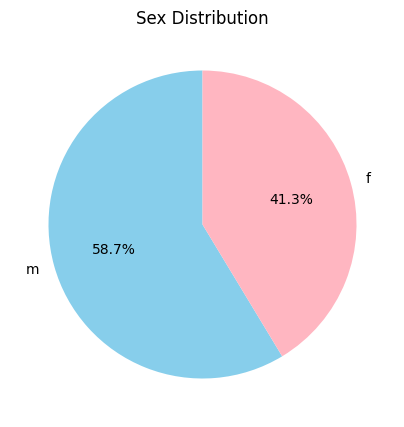

In [85]:
counts = df['sex'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=90)
plt.title("Sex Distribution")
plt.show()

Interpretation

* The pie chart shows that 61% male vs 39% female, males possum dominate the dataset.

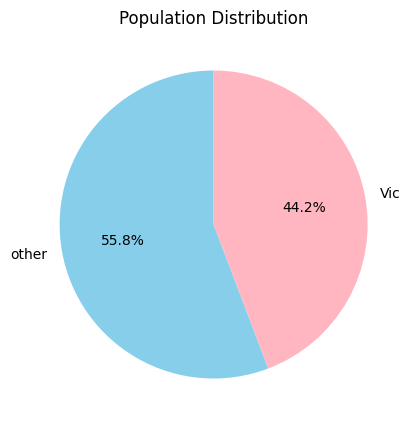

In [86]:
counts = df['Pop'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=90)
plt.title("Population Distribution")
plt.show()

Interpretation

* The pie chart shows that “other” takes up more than half, which clearly indicate that it dominates the population distribution of the possums

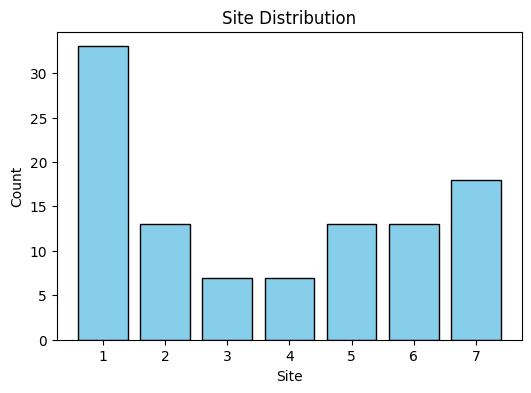

In [78]:
counts = df['site'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

plt.title("Site Distribution")
plt.xlabel("Site")
plt.ylabel("Count")
plt.show()

Interpretation

*  Some sites have noticeably more possums recorded than others, showing an uneven distribution across locations.

* Site 1 dominate the dataset with largest number of possum, while site 3 and 4 has the lowest number of possum

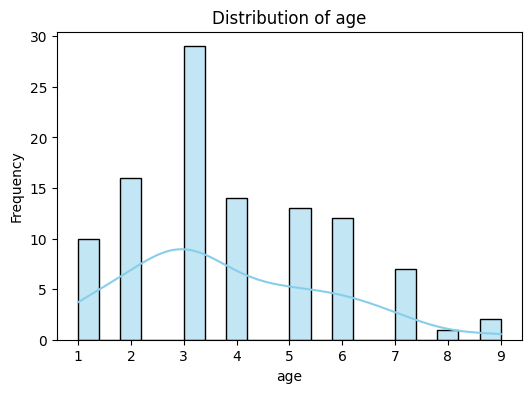

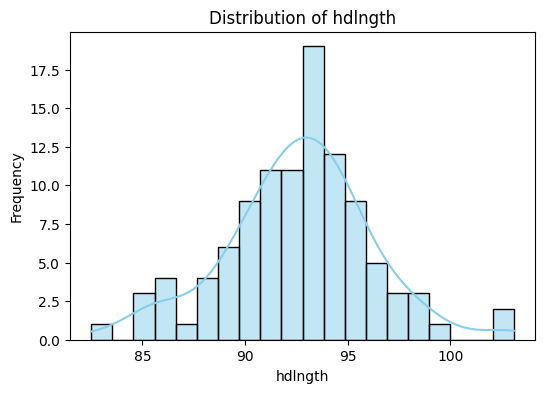

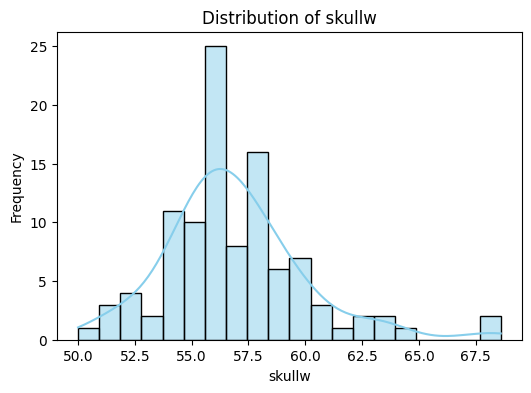

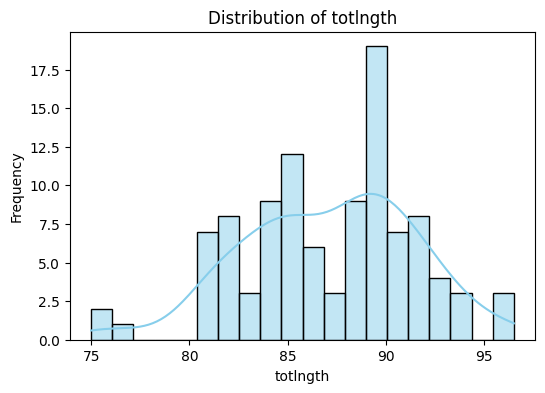

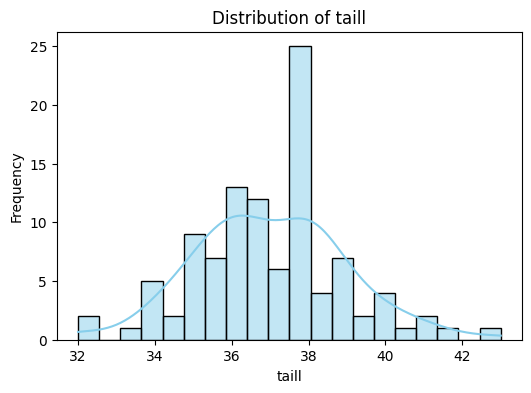

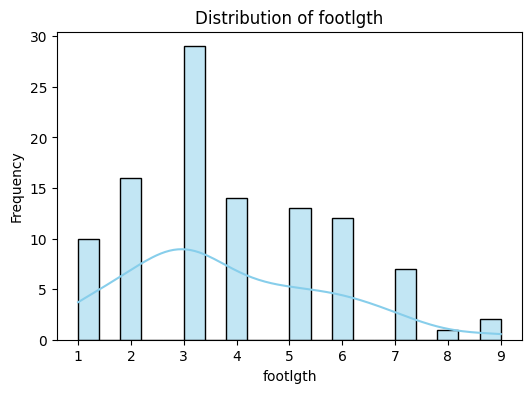

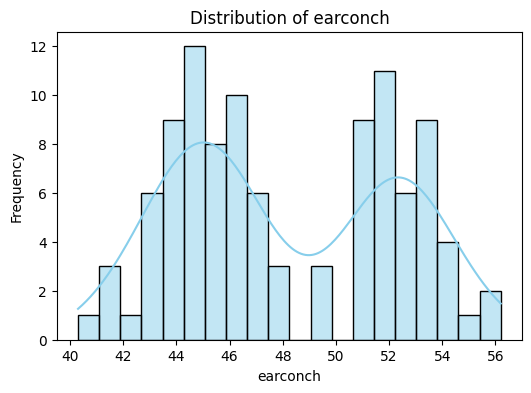

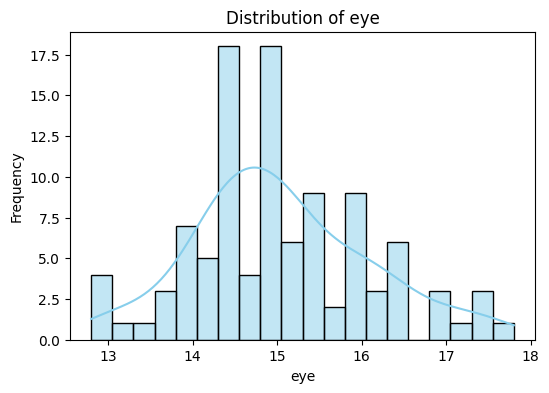

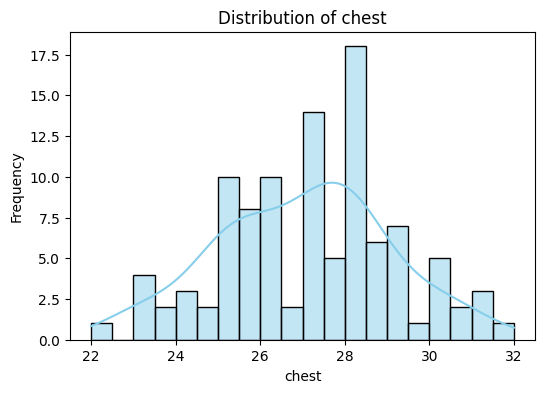

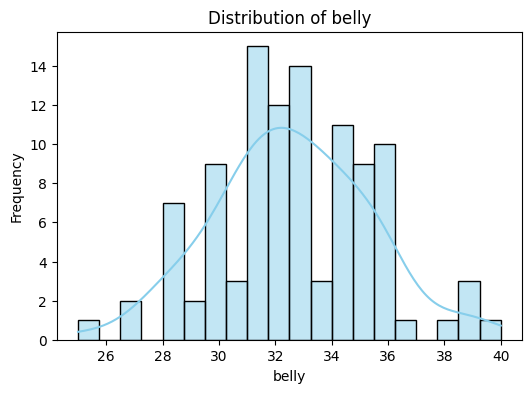

In [68]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    
# Histogram + KDE
    sns.histplot(data=df, x=col, kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Interpretation

Distribution of  Age

* 

Distribution of  head length

* 


Distribution of  Skull weight

* 


Distribution of  Tooth length 

* 


Distribution of  Tail length

* 


Distribution of  Foot length 

* 


Distribution of earconch

* 


Distribution of eye

* 

Distribution of chest

* 


Distribution of belly

* 




C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


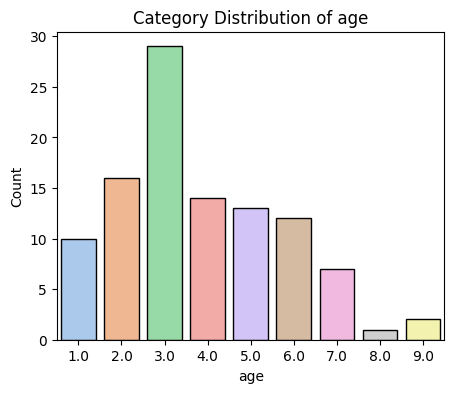

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


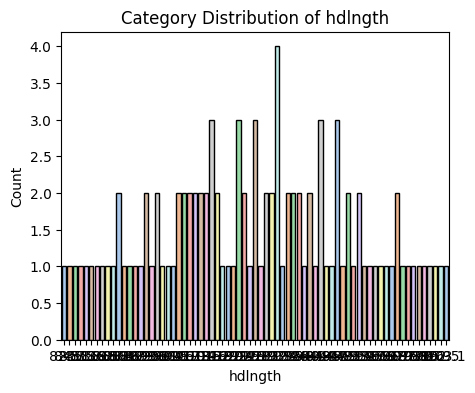

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


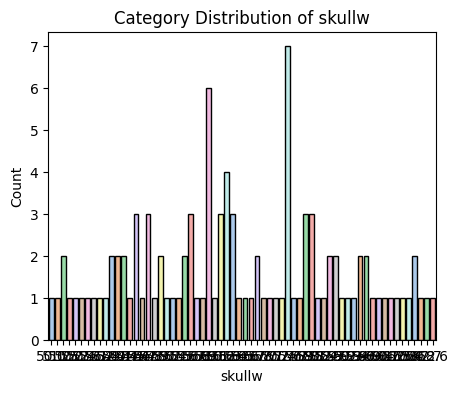

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


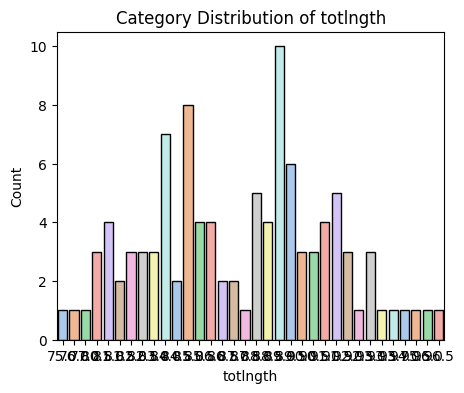

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


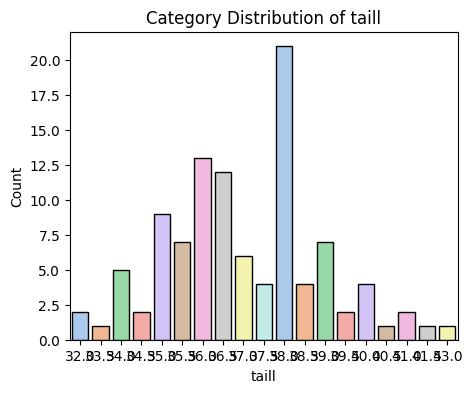

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


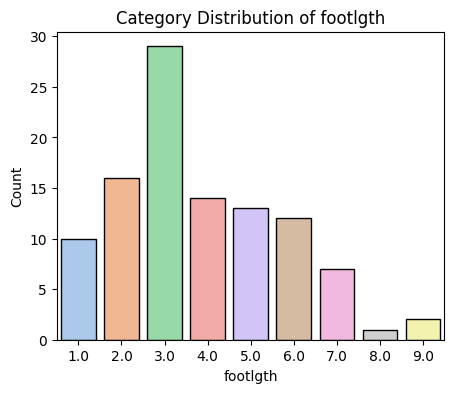

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


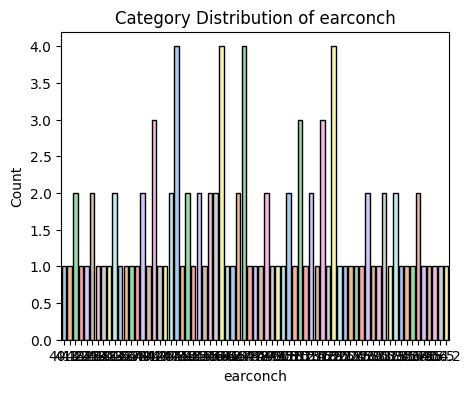

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


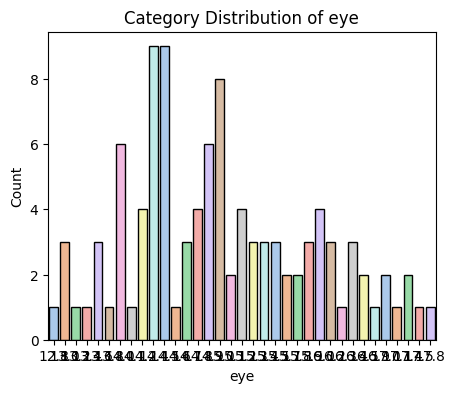

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


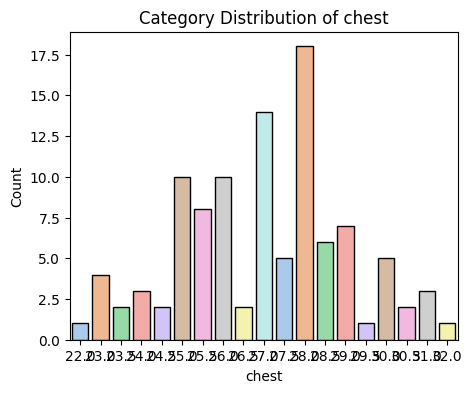

C:\Users\USER\AppData\Local\Temp\ipykernel_11852\1185871402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")


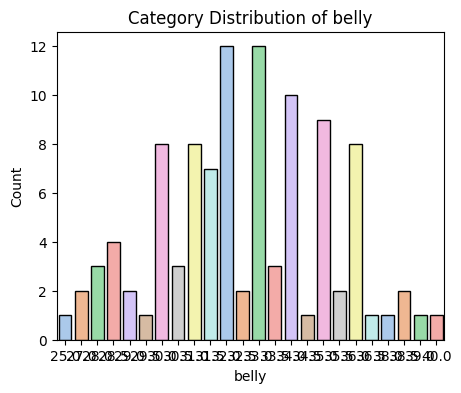

In [79]:
for col in numerical_features:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, palette="pastel", edgecolor="black")
    #sns.countplot(data=df, x="sex", hue="sex", palette="pastel", legend=True)
    plt.title(f"Category Distribution of {col}")
    plt.ylabel("Count")
    plt.show()

Measure of Spread

In [80]:

# Compute variance, standard deviation, Range for each numerical feature using a for loop
for col in numerical_features:
    min_val = df[col].min()
    max_val = df[col].max()
    range_value  = df[col].max()- df[col].min()
    variance_val = df[col].var()
    std_val = df[col].std()
    q25 = df[col].quantile(0.25)
    q50 = df[col].quantile(0.50)  
    q75 = df[col].quantile(0.75)
    iqr_val = q75 - q25
    skewness_val = skew(df[col])
    kurtosis_val = kurtosis(df[col])
    unit = units[col]
    print(f"\nMeasure of Spread for {col} in {unit}:")
    print(f"  Minimum : {min_val:.2f} {unit}")
    print(f"  Maximum: {max_val:.2f} {unit}")
    print(f"  Range: {range_value:.2f} {unit}")
    print(f"  Variance: {variance_val:.2f} {unit}")
    print(f"  standard deviation: {std_val:.2f} {unit}")
    print(f"  25th Percentile (Q1): {q25:.2f} {unit}")
    print(f"  50th Percentile (Median/Q2): {q50:.2f} {unit}")
    print(f"  75th Percentile (Q3): {q75:.2f} {unit}")
    print(f"  IQR: {iqr_val:.2f} {unit}")
    print(f"  skewness: {skewness_val:.2f} {unit}")
    print(f"  Kurtosis: {kurtosis_val:.2f} {unit}")


Measure of Spread for age in years:
  Minimum : 1.00 years
  Maximum: 9.00 years
  Range: 8.00 years
  Variance: 3.59 years
  standard deviation: 1.89 years
  25th Percentile (Q1): 2.75 years
  50th Percentile (Median/Q2): 3.00 years
  75th Percentile (Q3): 5.00 years
  IQR: 2.25 years
  skewness: 0.56 years
  Kurtosis: -0.27 years

Measure of Spread for hdlngth in cm:
  Minimum : 82.50 cm
  Maximum: 103.10 cm
  Range: 20.60 cm
  Variance: 12.77 cm
  standard deviation: 3.57 cm
  25th Percentile (Q1): 90.67 cm
  50th Percentile (Median/Q2): 92.80 cm
  75th Percentile (Q3): 94.72 cm
  IQR: 4.05 cm
  skewness: -0.06 cm
  Kurtosis: 0.79 cm

Measure of Spread for skullw in kg:
  Minimum : 50.00 kg
  Maximum: 68.60 kg
  Range: 18.60 kg
  Variance: 9.69 kg
  standard deviation: 3.11 kg
  25th Percentile (Q1): 54.98 kg
  50th Percentile (Median/Q2): 56.35 kg
  75th Percentile (Q3): 58.10 kg
  IQR: 3.12 kg
  skewness: 0.99 kg
  Kurtosis: 2.30 kg

Measure of Spread for totlngth in cm:
  Minimu

### Interpretation

Age


* The youngest possum is 1 year, and the oldest is 9 years.

* The range (8 years) shows a wide spread of ages.

* The variance (3.59) and standard deviation (≈1.89 years) indicate that possum ages tend to vary about 2 years above or below the mean age.

* Overall, the age distribution shows moderate variability ages are not too tightly clustered but not extremely spread out either ages range from 1 to 9 years, with a moderate spread.

* The IQR of 2.25 years shows that it is very close to the middle 50% of possums are aged between 3 and 6 years.

* Slight positive skewness (0.56) since the mean(3.82) is greater than median(3.00) indicates more younger possums than older ones.

* Negative kurtosis (-0.27) means the distribution is flatter than normal (ages are more evenly spread).

Skull Weight


* The lightest possum skull weighs 50 kg while the heaviest weighs 68.0 kg.

* The range of 18.6 kg suggests a large spread in skull weights.

* A standard deviation of 3.11 kg means most weights deviate about 18.6 kg from the mean.

* The varaince 9.69 indicates high variability in possum body weight.

* Weights vary widely, with an IQR of 3.12 kg.

* The median weight is 56.35 kg, showing most possums cluster in the mid-range.

* Positive skewness (0.99) means a few very heavy possums above the average.

* Kurtosis (2.30) suggests the distribution is more peaked than normal (values concentrated near the mean with some outliers).

Head length


* Possums have head lengths ranging between 82.50 mm and 103.10 mm.

* The range of 20.60 cm shows a moderate spread.

* A standard deviation of 3.57 mm means most head lengths cluster fairly close to the mean.

* Overall, there is moderate variability in head size.

* Near-zero skewness (-0.06) means the data is fairly symmetric.

* Low kurtosis (0.79) indicates a distribution flatter than normal, with few outliers.


Tooth length

* The average tooth length of the possum is 87.09cm.

* The most common tooth length of the possum is 89.00cm.

* The median tooth length of the possum is 88.00cm.

* tooth lengths vary between 75 mm and 96.50 mm.

* The wide range of 21.50 mm reflects significant differences in tooth size.

* A standard deviation of 4.31 mm indicates that most possums differ more than 4 mm from the average tooth length.

* This shows high variability in tooth length.

* Slight negative skew (-0.28) suggests a few larger possums.

* Negative kurtosis (-0.75) means the distribution is flatter than normal, with more evenly spread lengths

Tail length

* The average tail length of the possum is 37.01cm.

* The most common tail length of the possum is 38.00cm.

* The median tail length of the possum is 37.00cm.

* Tail lengths range from 32.00 cm to 43.00 cm.

* The range of 11.0 cm indicates wide variation in tail size.

* A standard deviation of 1.96 cm shows tails deviate about 2cm from the mean.

* This implies moderate to high variability in possum tail length.

* Tail lengths range from 24 to 42 cm, with most between 28 and 34 cm.

* positive skew (0.17) shows slightly more longer tails.

* Kurtosis (0.32) suggests a flat distribution with fewer extreme values.

Outlier Detection pipeline

In [35]:
#Detect and handle outliers in numeric features using IQR
def detect_outliers_iqr(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = x[(x < lower_bound) | (x > upper_bound)]
    return {
        "outliers": outliers,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

# Detect and handle outliers in numeric features using Normalization / Standardization
def detect_outliers_zscore(x, threshold=3):
    z_scores = (x - x.mean()) / x.std()
    outliers = x[abs(z_scores) > threshold]
    return {
        "outliers": outliers,
        "z_scores": z_scores,
        "threshold": threshold
    }

# Detect outliers
for col in numerical_features:
    print(f"\nIQR Outlier Detection for {col}")

    iqr_result = detect_outliers_iqr(df[col].dropna())
    print("Lower Bound:", iqr_result["lower_bound"])
    print("Upper Bound:", iqr_result["upper_bound"])
    print("Outliers:\n", iqr_result["outliers"].values)
    
    print(f"\nZ-Score Outlier Detection for {col}")
    zscore_result = detect_outliers_zscore(df[col].dropna())
    print("Threshold:", zscore_result["threshold"])
    print("Outliers:\n", zscore_result["outliers"].values)



IQR Outlier Detection for age
Lower Bound: -0.625
Upper Bound: 8.375
Outliers:
 [9. 9.]

Z-Score Outlier Detection for age
Threshold: 3
Outliers:
 []

IQR Outlier Detection for hdlngth
Lower Bound: 84.6
Upper Bound: 100.79999999999998
Outliers:
 [103.1 102.5  82.5]

Z-Score Outlier Detection for hdlngth
Threshold: 3
Outliers:
 []

IQR Outlier Detection for skullw
Lower Bound: 50.2875
Upper Bound: 62.7875
Outliers:
 [67.7 63.2 63.  63.2 64.2 62.8 50.  68.6]

Z-Score Outlier Detection for skullw
Threshold: 3
Outliers:
 [67.7 68.6]

IQR Outlier Detection for totlngth
Lower Bound: 75.0
Upper Bound: 99.0
Outliers:
 []

Z-Score Outlier Detection for totlngth
Threshold: 3
Outliers:
 []

IQR Outlier Detection for taill
Lower Bound: 32.6875
Upper Bound: 41.1875
Outliers:
 [32.  32.  43.  41.5]

Z-Score Outlier Detection for taill
Threshold: 3
Outliers:
 [43.]

IQR Outlier Detection for footlgth
Lower Bound: -0.625
Upper Bound: 8.375
Outliers:
 [9. 9.]

Z-Score Outlier Detection for footlgth
Th

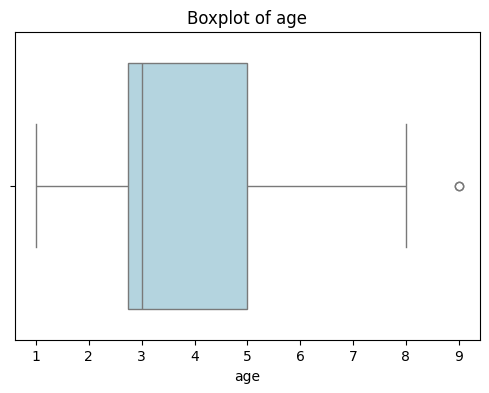

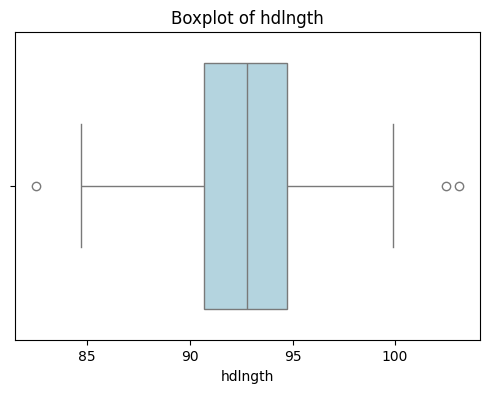

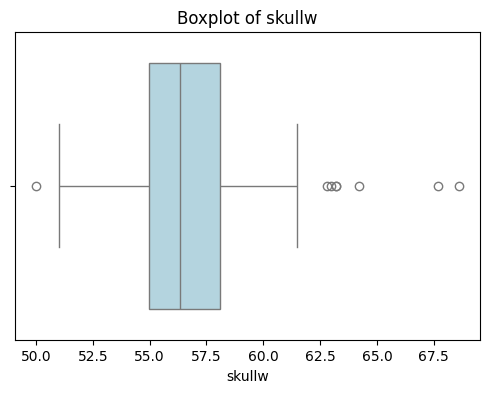

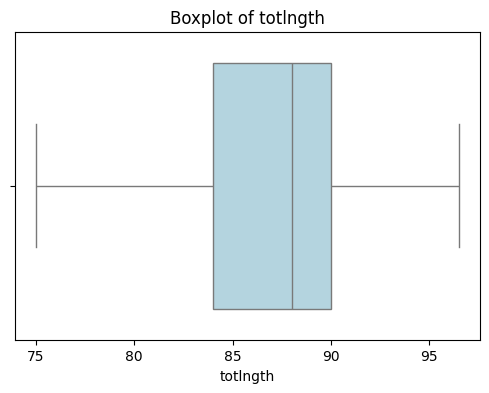

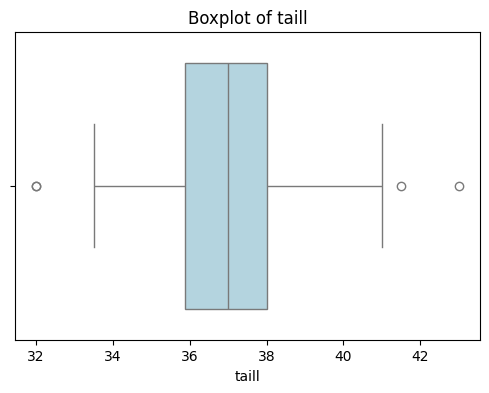

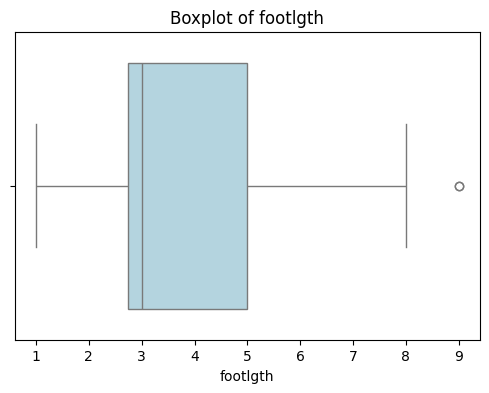

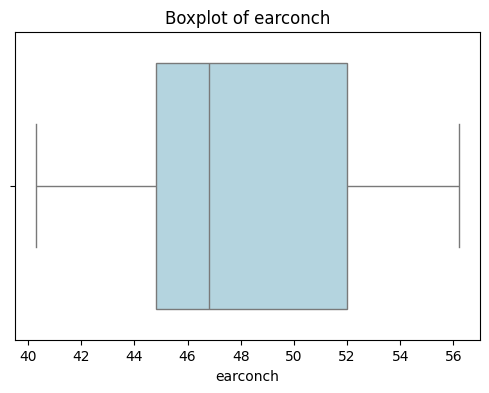

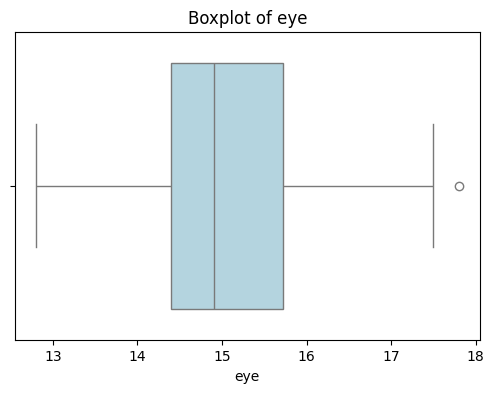

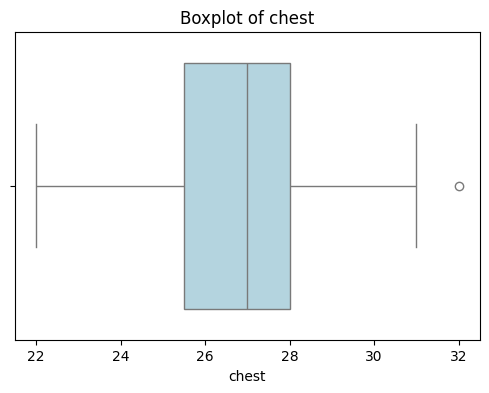

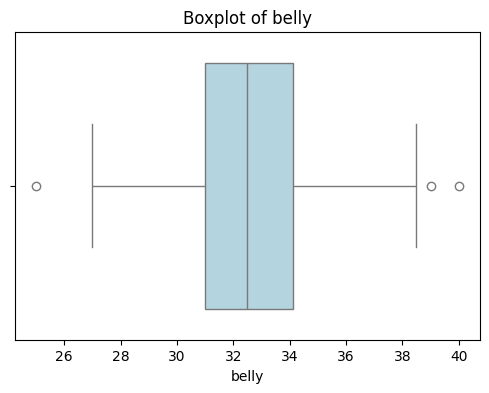

In [66]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, color="lightblue")
    plt.title(f"Boxplot of {col}")
    plt.show()


Interpretation

Box plot of  Age

* 

Box plot  of  head length

* 


Box plot  of  Skull weight

* 


Box plot  of  Tooth length 

* 


Box plot  of  Tail length

* 


Box plot  of  Foot length 

* 


Box plot  of earconch

* 


Box plot  of eye

* 

Box plot  of chest

* 


Box plot  of belly

* 




Ear lengths vary between 3.8 cm and 6.9 cm.

The small range of 3.1 cm shows values are fairly close together.

A standard deviation of 0.82 cm means ear sizes deviate less than 1 cm from the mean.

This indicates low variability in possum ear length.

Ear length has a narrow range and low variability.

Skewness near zero (0.05) indicates symmetry.

Negative kurtosis (-0.65) shows a flatter distribution than normal.

Foot lengths range between 5.9 cm and 10.2 cm.

The range of 4.3 cm reflects some spread in foot size.

With a standard deviation of 1.12 cm, foot sizes are moderately spread around the mean.

This shows moderate variability in foot length.

Foot lengths vary moderately between 6 and 11 cm.

Most possums fall between 7.0 and 8.8 cm.

Positive skew (0.30) suggests a few possums with very large feet.

Kurtosis (0.10) is close to normal, meaning no extreme outliers.